# Visualización dinámica

En esta sesión estudiaremos algunas técnicas para la visualización dinámica de conjuntos de datos que tienen alguna componente temporal, haciendo especial énfasis en aquellos problemas para los que el dinamismo en la representación realmente supone alguna ventaja con respecto a visualizaciones estáticas clásicas. 

Comenzaremos con una breve descripción técnica de las herramientas que utilizaremos para generar las animaciones, así como su integración con `notebook`. A continuación, presentaremos diferentes ejemplos de problemas para los cuales la visualización dinámica permite comprender más en detalle el conjunto de datos o su comportamiento.

## Visualización interactiva con <tt>matplotlib</tt>

Matplotlib da soporte explícito para la creación de animaciones a través de la API [`matplotlib.animation`](http://matplotlib.org/api/animation_api.html). En este paquete podemos encontrar distintas clases y métodos para crear animaciones, controlar su ciclo de vida, reproducirlas y exportarlas a un formato conveniente. En la documentación oficial podemos encontrar también diversos [ejemplos ilustrativos](http://matplotlib.org/1.5.1/examples/animation/).

Esta API está soportada en `notebook` [a partir de la versión 1.4 de `matplotlib`](http://matplotlib.org/users/whats_new.html#new-in-matplotlib-1-4) mediante el uso de un backend interactivo.Esto es necesario debido a que la opción clásica `%matplotlib inline` sólo permite generar imágenes estáticas. Este backend se denomina `notebook`, y lo seleccionaremos con el siguiente [`magic`](http://ipython.readthedocs.org/en/stable/interactive/tutorial.html#magic-functions):

In [116]:
%matplotlib notebook

Comprobamos las capacidades de este backend creando una gráfica sencilla:

<IPython.core.display.Javascript object>


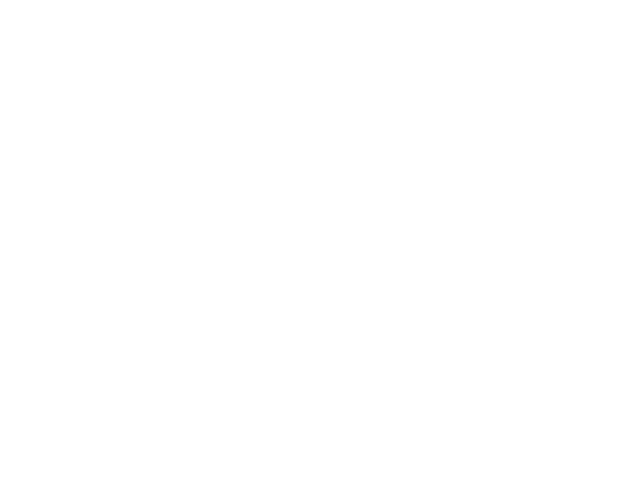

In [94]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
plt.plot(np.arange(-5,5,0.1)**3);

Como podemos ver, la gráfica resultante es interactiva, lo que nos permite hacer zoom, desplazar los ejes, modificar el tamaño, etc. Si en algún momento deseamos terminar esta interactividad, podemos hacer que la gráfica se convierta en una imagen estática, equivalente a si usásemos el backend `inline`.

## Análisis de información sociológica

En esta sección utilizaremos animaciones para analizar distintos tipos de información sociológica. El sitio web [Gapminder](http://www.gapminder.org/) es un magnífico repositorio de este tipo de información a nivel mundial, incluyendo series históricas desde el año 1800. En la hoja de cálculo <tt>social_data.xlsx</tt> se incluye información descargada de esta web para distintas variables y países.

Nuestro primer objetivo será *visualizar la evolución temporal de la esperanza de vida de los habitantes de un conjunto de países frente a la [renta per cápita, o producto interior bruto (GDP) por habitante](https://en.wikipedia.org/wiki/Per_capita_income)*.

Hacemos una breve exploración inicial de nuestros datos:

In [95]:
import pandas as pd
from IPython.display import display, HTML
df = pd.read_excel('../data/social_data.xlsx', sheetname=None)
#Para cada hoja de cálculo dentro del archivo, mostramos la cabecera del DataFrame como HTML.
for sh in df:    
    display(HTML('<h3>' + sh + '</h3>' + df[sh].head().to_html()))

,Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,603,603,603,603,603,603,603,603,603,603,604,604,604,604,604,604,604,604,604,604,604,607,609,611,613,615,617,619,621,623,625,627,630,632,634,636,638,640,643,645,647,649,651,654,656,658,660,663,665,667,669,672,674,676,678,681,683,685,688,690,692,695,697,699,702,704,707,709,711,714,716,719,721,724,726,729,731,734,736,739,741,744,746,749,751,754,756,759,761,764,767,769,772,774,777,780,782,785,788,790,793,796,798,801,804,807,809,812,815,818,820,823,826,829,833,837,841,845,849,853,857,862,868,874,879,885,890,896,902,908,913,919,925,931,937,943,949,955,961,967,973,979,985,991,997,1004,1010,1016,1022,1029,1035,1050,1069,1116,1122,1125,1155,1134,1176,1187,1206,1192,1188,1185,1182,1182,1168,1173,1187,1178,1174,1092,1046,1137,1170,1201,1231,1119,1179,1155,1158,1284,1402,1454,1429,1384,1486,1230,1113,1087,1028,1022,941,810,725,872,895,921,947,972,962,862,1053,1097,1067,1146,1173,1298,1311,1548,1637,1695,1893,1884,1877,1925
1,Albania,667,667,668,668,668,668,668,668,668,668,668,668,669,669,669,669,669,669,669,669,669,671,672,674,676,677,679,680,682,683,685,686,688,689,691,693,694,696,697,699,701,702,704,705,707,709,710,712,713,715,717,718,720,722,723,725,727,728,730,731,733,735,736,738,740,742,743,745,747,748,750,761,773,784,796,808,820,832,844,857,870,882,896,909,922,936,950,964,979,993,1008,1022,1036,1051,1065,1080,1095,1110,1125,1141,1157,1172,1188,1203,1219,1236,1252,1269,1285,1302,1320,1342,1365,1389,1406,1424,1442,1460,1479,1498,1516,1535,1554,1572,1591,1610,1629,1647,1666,1685,1696,1707,1717,1728,1738,1748,1758,1768,1778,1788,1797,1807,1816,1825,1834,1842,1851,1859,1867,1875,1883,1965,1968,2048,2108,2222,2244,2387,2493,2594,2724,2744,2832,2926,3023,3129,3242,3359,3475,3587,3712,3849,3988,4174,4177,4178,4182,4188,4194,4201,4218,4227,4237,4248,4259,4267,4281,4294,4307,4325,4350,3081,2877,3172,3457,3941,4326,3909,4434,4912,5305,5730,5913,6274,6672,7075,7476,7977,8644,8994,9374,9640,9811,9961,10160,10620
2,Algeria,716,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,743,751,759,768,776,784,793,802,810,819,828,837,846,855,865,874,884,893,903,913,923,933,943,953,964,974,985,996,1007,1017,1029,1040,1051,1063,1074,1086,1098,1110,1122,1134,1146,1159,1172,1184,1197,1210,1223,1237,1250,1264,1278,1292,1306,1320,1334,1349,1364,1378,1393,1409,1424,1440,1455,1471,1487,1503,1520,1536,1553,1570,1587,1604,1622,1640,1657,1676,1694,1712,1731,1750,1769,1788,1808,1827,1847,1867,1888,1908,1929,1950,1998,2046,2096,2132,2169,2206,2244,2281,2319,2358,2418,2477,2537,2596,2654,2713,2771,2828,2885,2942,2998,3054,3110,3165,3220,3274,3328,3381,3434,3486,3538,3589,3640,3690,3740,3789,3838,3886,3933,3980,3957,4070,4077,4307,4359,4712,5166,5273,6147,6470,5602,4481,5551,5693,5916,5478,5811,6319,6747,7227,6427,7556,7581,7812,8119,8400,8888,9730,10293,10166,10160,10477,10696,10947,11030,10722,10378,9888,10115,10113,9748,9693,9279,9006,9168,9375,9322,9646,981

,Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,28.2110,28.200753,28.190507,28.18026,28.170013,28.159767,28.14952,28.139273,28.129027,28.11878,28.108533,28.098287,28.08804,28.077793,28.067547,28.0573,28.047053,28.036807,28.02656,28.016313,28.006067,27.99582,27.985573,27.975327,27.96508,27.954833,27.944587,27.93434,27.924093,27.913847,27.9036,27.893353,27.883107,27.87286,27.862613,27.852367,27.84212,27.831873,27.821627,27.81138,27.801133,27.790887,27.78064,27.770393,27.760147,27.7499,27.739653,27.729407,27.71916,27.708913,27.698667,27.68842,27.678173,27.667927,27.65768,27.647433,27.637187,27.62694,27.616693,27.606447,27.5962,27.585953,27.575707,27.56546,27.555213,27.544967,27.53472,27.524473,27.514227,27.50398,27.493733,27.483487,27.47324,27.462993,27.452747,27.4425,27.432253,27.422007,27.41176,27.401513,27.391267,27.38102,27.370773,27.360527,27.35028,27.340033,27.329787,27.31954,27.309293,27.299047,27.2888,27.278553,27.268307,27.25806,27.247813,27.237567,27.22732,27.217073,27.206827,27.19658,27.186333,27.176087,27.16584,27.155593,27.145347,27.1351,27.124853,27.114607,27.10436,27.094113,27.083867,27.07362,27.063373,27.053127,27.04288,27.032633,27.022387,27.012140,7.045063,26.991647,26.9814,27.073893,27.166387,27.25888,27.351373,27.443867,27.53636,27.628853,27.721347,27.81384,27.906333,27.998827,28.091320,28.183813,28.276307,28.368800,28.461293,28.553787,28.646280,28.738773,28.831267,28.923760,29.016253,29.108747,29.201240,29.293733,29.386227,29.478720,29.571213,29.663707,29.7562,30.11694,30.73568,31.35442,31.97316,32.5909,33.20964,33.82838,34.44712,35.06586,35.6846,36.30334,36.92308,37.54182,38.15956,38.7753,39.38804,39.99878,40.60552,41.20626,41.8,42.2,42.6,43.0,43.5,44.0,44.5,45.0,44.3,43.5,43.5,44.3,44.2,43.0,41.3,42.8,43.5,45.2,46.9,50.2,50.3,50.2,50.4,50.5,50.1,50.4,50.6,50.7,50.0,50.8,51.0,51.1,51.6,52.1,52.5,52.9,53.2,53.6,54.0,54.5,54.8,55.2,55.5,56.2,56.91,57.63
1,Albania,35.4000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,35.4000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,35.4000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,35.4000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,35.4000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,35.4000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,35.4000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,35.40000,35.400000,35.400000,35.4000,35.400000,35.400

,Country,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3280000,3280000,3323519,3448982,3625022,3810047,3973968,4169690,4419695,4710171,5021241,5351413,5813814,6394908,7034081,7752118,7839426,7934798,8038312,8150037,8270024,8398309,8534913,8679848,8833127,8994793,9164945,9343772,9531555,9728645,9935358,10148841,10368600,10599790,10849510,11121097,11412821,11716896,12022514,12315553,12582954,12831361,13056499,13222547,13283279,13211412,12996923,12667001,12279095,11912510,11630498,11438949,11337932,11375768,11608351,12067570,12789374,13745630,14824371,15869967,16772522,17481800,18034130,18511480,19038420,19701940,20531160,21487079,22507368,23499850,24399948,25183615,25877544,26528741,27207291,27962207,28809167,29726803,30682500,31627506,32526562
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10661,10737,10813,10889,10966,11043,11121,11200,11279,11358,11439,11519,11601,11683,11765,11848,11932,12016,12101,12187,12273,12359,12447,12535,12623,12712,12802,12892,12983,13075,13167,13260,13354,13448,13543,13639,13735,13832,13930,14028,14127,14227,14328,14429,14531,14633,14737,14841,14946,15051,15157,15264,15372,15481,15590,15700,15700,15700,15700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,410445,423591,438671,457234,478227,506889,552800,610036,672544,741688,819950,901122,963956,1015991,1123210,1263171,1287499,1316086,1348097,1382881,1419969,1459089,1500152,1543224,1588478,1636054,1685901,1737645,1790533,1843596,1896125,1947786,1998695,2049147,2099657,2150602,2202040,2253842,2305999,2358467,2411229,2464338,2517869,2571845,2626290,2681245,2735329,2788315,2842620,2901590,2966799,3041003,3121336,3197064,3253659,3281453,3275438,3240613,3189623,3140634,3106727,3092034,3092471,3102898,3114851,3121965,3124093,3123112,3117045,3103758,3082172,3050741,3010849,2968026,2929886,2901883,2886010,2880667,2883281,2889676,2896679
4,Algeria,2503218,2595056,2713079,2880355,3082721,3299305,3536468,3811028,4143163,4525691,4946166,5404045,6063800,6876190,7797418,8872247,9039913,9216395,9405445,9609507,9829717,10065829,10316288,10578453,10848971,11124892,11404859,11690152,11985130,12295973,12626953,12980269,13354197,13744383,14144437,14550033,14960111,15377095,15804428,16247113,16709098,17190236,17690184,18212331,18760761,19337723,19943667,20575701,21228288,21893857,22565908,23241276,23917889,24591493,25257671,25912364,26554277,27180921,27785977,28362015,28904300,29411839,29887717,30336880,30766551,31183658,31590320,31990387,32394886,32817225,33267887,33749328,34261971,34811059,35401790,36036159,36717132,37439427,38186135,38934334,39666519


Como podemos ver, disponemos de información sobre la renta per cápita (GDP), la esperanza de vida, y la población de cada país desde el año 1800. 

En la primera parte de la práctica, analizaremos la relación entre esperanza de vida y renta per cápita de los siguientes países: China, EEUU, Brasil, Alemania, Sudáfrica y Australia.

In [96]:
countries = ['China', 'United States', 'Brazil', 'Germany', 'South Africa', 'Australia']
#Indexamos los Dataframes de "GDP" y "Life Expectancy" por países, y filtramos los seleccionados.
gdp = df['GDP'].set_index('Country').loc[countries]
lfexp = df['Life Expectancy'].set_index('Country').loc[countries]
display(gdp)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
China,985,985,985,985,985,985,985,985,985,985,...,6360,7225,7880,8565,9430,10274,11017,11805,12609,13334
United States,2128,2168,2203,2167,2166,2211,2252,2274,2115,2218,...,50599,51011,50384,48558,49373,49781,50549,51282,52118,53354
Brazil,1109,1109,1109,1109,1109,1110,1110,1110,1110,1110,...,12732,13364,13906,13749,14660,15101,15234,15518,15412,15441
Germany,1639,1651,1663,1674,1686,1698,1710,1722,1734,1746,...,39352,40693,41199,38975,40632,42080,42959,42887,43444,44053
South Africa,1480,1480,1480,1480,1481,1481,1481,1481,1481,1482,...,11597,12052,12263,11903,12087,12291,12375,12454,12446,12509
Australia,815,816,818,820,822,824,826,828,830,832,...,39416,40643,41312,41170,41330,41706,42522,42840,43219,44056


Como primera exploración visual, dibujamos un gráfico de burbujas que muestre la relación en el año 2015 entre la esperanza de vida y la renta per cápita para los países seleccionados.

<IPython.core.display.Javascript object>


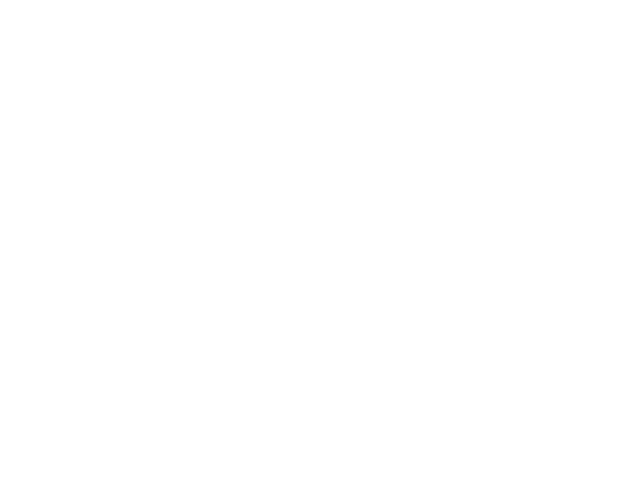

In [97]:
fig = plt.figure()
ax = fig.add_subplot(111)
#Configuración de las etiquetas de los ejes
plt.xlabel('Income per person (Inflation-adjusted $)')
plt.ylabel('Life Expectancy (years)')
#Creación de un punto para cada país
for country in countries:
    plt.plot([gdp[2015][country]], [lfexp[2015][country]], 'o', label=country, markersize=30)
#Leyenda:
ax.legend(loc='lower right', fontsize=12, markerscale=0.5, numpoints=1, frameon=False)

<div style="font-size:125%; display:inline; font-weight:bold">Ejercicio:</div> *Crear una animación a partir de la gráfica anterior, que permita visualizar la evolución de la relación entre renta per cápita y esperanza de vida durante toda la serie temporal disponible.* 

La forma más simple y recomendada de crear una animación en matplotlib es a través de la función [`FuncAnimation`](http://matplotlib.org/api/animation_api.html#matplotlib.animation.FuncAnimation), que genera el conjunto de *frames* a partir de la ejecución repetida de una función definida por el usuario (en este caso, la función `update_plot`). Los valores de los argumentos pasados a esta función y el intervalo entre imágenes consecutivas se controlan con los parámetros `frames` e `interval`.

<IPython.core.display.Javascript object>


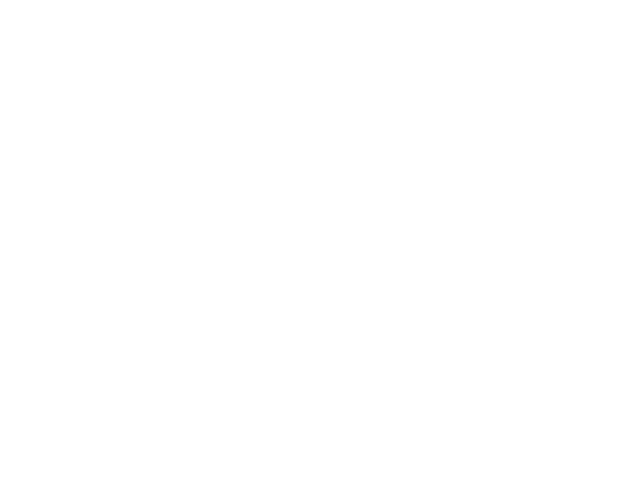

In [98]:
import matplotlib.animation as animation
fig = plt.figure()
ax = fig.add_subplot(111)
#Configuración de los límites de la gráfica y de las etiquetas de los ejes.
ax.set_xlim((0, 60000))
ax.set_ylim((0, 90))
plt.xlabel('Income per person (Inflation-adjusted $)')
plt.ylabel('Life Expectancy (years)')
#Creación de un punto para cada país, inicialmente sin datos.
circs = {}
for country in countries:
    circs[country] = plt.plot([], [], 'o', label=country, markersize=30)[0]    
#Leyenda y etiqueta para el año actual.
ax.legend(loc='lower right', fontsize=12, markerscale=0.5, numpoints=1, frameon=False)
cur_year = ax.annotate("", (0.05, 0.9), xycoords='axes fraction', size='x-large', weight='bold')

def update_plot(year):
    """
    Función de animación, en la que se actualiza la posición del punto correspondiente
    a cada país, así como la etiqueta del año actual.
    """
    #Actualizar el centro de cada punto con set_data
    for country in countries:
        circs[country].set_xdata([gdp[year][country]])
        circs[country].set_ydata([lfexp[year][country]])
        
    #Actualizar la etiqueta del año correspondiente con set_text
    cur_year.set_text(year)
    return circs.values() + [cur_year]

#Creamos la animación, ejecutando la función 'update_plot' para cada año del dataframe
ani = animation.FuncAnimation(fig, update_plot, gdp.keys(), interval=100, repeat=False)

### Exportando animaciones a través del paquete `JSAnimation`

Otro método recomendado para visualizar animaciones en un `notebook` es el uso de la librería [JSAnimation](https://github.com/jakevdp/JSAnimation). La [instalación es muy sencilla](https://gist.github.com/gforsyth/188c32b6efe834337d8a), e incluso podemos descargar directamente las fuentes del proyecto e importarlas desde nuestro código, al tratarse de un proyecto muy pequeño. Para instalar `JSAnimation` en [Anaconda](https://www.continuum.io/downloads), podemos utilizar el siguiente comando:

```
conda install --channel https://conda.anaconda.org/IOOS jsanimation
```

O utilizar pip y descargar desde el repositorio, mediante el siguiente comando:

```
pip install git+https://github.com/jakevdp/JSAnimation.git
```

Esta librería evita que sea necesario utilizar un intérprete de Python cada vez que deseemos reproducir una animación ya generada, pues esta se almacena completamente en el código HTML y se reproduce utilizando Javascript.

Antes de utilizar `JSAnimation`, se recomienda seleccionar el backend `inline` de matplotlib. A continuación, simplemente debemos importar la función `display_animation`.

In [99]:
%matplotlib inline
from JSAnimation.IPython_display import display_animation

Esta función recibe cualquier objeto de tipo [`Animation`](http://matplotlib.org/api/animation_api.html#matplotlib.animation.Animation) y genera un HTML dinámico que puede incluirse en cualquier página web, incluido un `notebook` exportado como HTML. Además, se incluye un conjunto de controles que nos permiten pausar, modificar la velocidad de la animación, o seleccionar un instante concreto de la misma. El único inconveniente de usar este paquete es que la animación debe ser renderizada completamente antes de comenzar a reproducirse, lo que resulta incómodo para programar y depurar. Además, el archivo de `notebook` resultante de usar este paquete será considerablemente más grande, pues almacena la información binaria de todas las imágenes que componen las animaciones.

A continuación se muestra la misma animación del ejemplo anterior renderizada a través de `JSAnimation`.


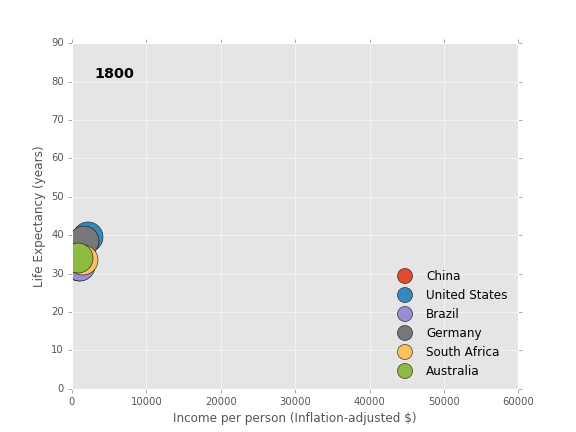

In [100]:
display_animation(ani)

In [101]:
#Volvemos a seleccionar el backend notebook para las siguientes animaciones
%matplotlib notebook

<div style="font-size:125%; display:inline; font-weight:bold">Ejercicio:</div> *Crear una nueva animación en la cual el tamaño del marcador correspondiente a cada país se actualice en función de la población. Utilizar para ello la función `get_population_markersize` que se proporciona a continuación:*

In [102]:
def get_population_markersize(pop):
    """
    Función para obtener el tamaño del marcador correspondiente a una determinada población.
    A una población de 2 millones se corresponde un tamaño 4.0, que escalará de forma que
    la superficie del marcador sea proporcional a esta relación.
    """
    return 4*np.sqrt(pop/2e6)

Además de esta función, es necesario tener en cuenta que los datos de población no están disponibles para todos los años en la serie temporal.

In [103]:
pop = df['Population'].set_index('Country').loc[countries]
display(pop)

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
China,321675013,350542958,380055273,402373519,411213424,402711280,380047548,363661158,365544192,377135349,...,1312600877,1319625197,1326690636,1333807063,1340968737,1348174478,1355386952,1362514260,1369435670,1376048943
United States,6801854,8294928,10361646,13480460,17942443,24136293,31936643,40821569,51256498,63810074,...,298860519,301655953,304473143,307231961,309876170,312390368,314799465,317135919,319448634,321773631
Brazil,3639636,4058652,4582325,5301068,6206694,7254194,8466005,9964419,11893392,14410738,...,190698241,192784521,194769696,196701298,198614208,200517584,202401584,204259377,206077898,207847528
Germany,22886919,23882461,25507768,28016571,31016143,33663143,36383150,39702235,43577358,48211294,...,81055904,80854515,80665906,80519685,80435307,80424665,80477952,80565861,80646262,80688545
South Africa,1440820,1494779,1577125,1714970,1894070,2091873,2310179,2629836,3142066,3845849,...,49027805,49693580,50348811,50992034,51621594,52237272,52837274,53416609,53969054,54490406
Australia,351014,342440,334002,348143,434095,742619,1256048,1724213,2253007,3088808,...,20606228,20975949,21370348,21770690,22162863,22542371,22911375,23270465,23622353,23968973


In [104]:
#Actualizamos el conjunto de años para los DataFrames de "GDP" y "Life Expectancy"
#Nota: pop.keys() puede resultar de ayuda.
gdp_filt = df['GDP'].set_index('Country').loc[countries][pop.keys()]
lfexp_filt = df['Life Expectancy'].set_index('Country').loc[countries][pop.keys()]
display(gdp_filt)

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
China,985,985,985,986,986,985,1023,1099,1015,918,...,6360,7225,7880,8565,9430,10274,11017,11805,12609,13334
United States,2128,2283,2242,2552,2792,3059,3714,4058,5292,5646,...,50599,51011,50384,48558,49373,49781,50549,51282,52118,53354
Brazil,1109,1110,1112,1136,1160,1185,1358,1488,1455,1492,...,12732,13364,13906,13749,14660,15101,15234,15518,15412,15441
Germany,1639,1759,1887,2024,2102,2182,2509,2819,3057,3733,...,39352,40693,41199,38975,40632,42080,42959,42887,43444,44053
South Africa,1480,1482,1484,1634,1469,1308,1626,1696,3400,3052,...,11597,12052,12263,11903,12087,12291,12375,12454,12446,12509
Australia,815,834,853,1399,2269,3267,4795,5431,7120,7418,...,39416,40643,41312,41170,41330,41706,42522,42840,43219,44056


<IPython.core.display.Javascript object>


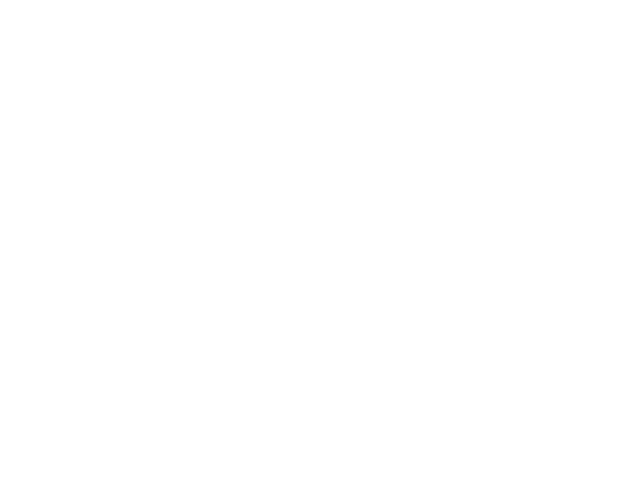

In [105]:
fig = plt.figure()
ax = fig.add_subplot(111)
#Configuración de los límites de la gráfica y de las etiquetas de los ejes.
ax.set_xlim((0, 60000))
ax.set_ylim((0, 90))
plt.xlabel('Income per person (Inflation-adjusted $)')
plt.ylabel('Life Expectancy (years)')
#Creación del punto para cada país
circs = {}
for country in countries:
    circs[country] = plt.plot([], [], 'o', label=country, markersize=30)[0]
#Leyenda y etiqueta para el año actual.
ax.legend(loc='lower right', fontsize=12, markerscale=0.5, numpoints=1, frameon=False)
cur_year = ax.annotate("", (0.05, 0.9), xycoords='axes fraction', size='x-large', weight='bold')

def update_plot(year):
    """
    Función de animación, en la que se actualiza la posición y el tamaño del punto 
    correspondiente a cada país, así como la etiqueta del año actual.
    """
    for country in countries:
        circs[country].set_xdata([gdp_filt[year][country]])
        circs[country].set_ydata([lfexp_filt[year][country]])

        #En este caso, además de actualizar la posición de cada punto con "set_data", debemos
        #actualizar el tamaño de cada punto con "set_markersize"
        circs[country].set_markersize(get_population_markersize(pop[year][country]))
        cur_year.set_text(year)

    return circs.values() + [cur_year]

#Creamos la animación con "FuncAnimation".
ani = animation.FuncAnimation(fig, update_plot, pop.keys(), interval=100, repeat=False)

Como comentario personal, esta gráfica aparenta añadir ruido y sería más legible si uno se preguntara qué quiere ver en el gráfico. Es decir, si lo que se quiere es comprobar si, visualmente, puede deducirse si existe relación entre 2 de las 4 variables mostradas para alguna de las 6 muestras elegidas existen mejores alternativas a esta gráfica.

Variables mostradas: esperanza de vida, número de habitantes, sueldo por persona y tiempo.
Muestras elegidas: los 6 países.


<div style="font-size:125%; display:inline; font-weight:bold">Ejercicio opcional:</div> *Repetir la animación anterior, pero incluyendo todos los años entre 1800 y 2015. Para aquellos años en los cuales no se dispone de datos de población, realizar una interpolación lineal para obtener una estimación del valor.*

In [106]:
todosanyos = np.arange(1800, 2015)
anyosdados = lfexp_filt.keys().tolist()

columnasfaltantes = todosanyos[np.where(~pd.Index(anyosdados).get_indexer(todosanyos) >= 0)[0]]
df_columnas = pd.DataFrame(columns = columnasfaltantes)

gdp_interpolated = gdp_filt.join(df_columnas, how="outer").reindex(columns=todosanyos).astype(np.float64)
gdp_interpolated.interpolate(method='linear', axis=1, inplace=True)

lfexp_interpolated = lfexp_filt.join(df_columnas, how="outer").reindex(columns=todosanyos).astype(np.float64)
lfexp_interpolated.interpolate(method='linear', axis=1, inplace=True)

pop_interpolated = pop.join(df_columnas, how="outer").reindex(columns=todosanyos).astype(np.float64)
pop_interpolated.interpolate(method='linear', axis=1, inplace=True)

<IPython.core.display.Javascript object>


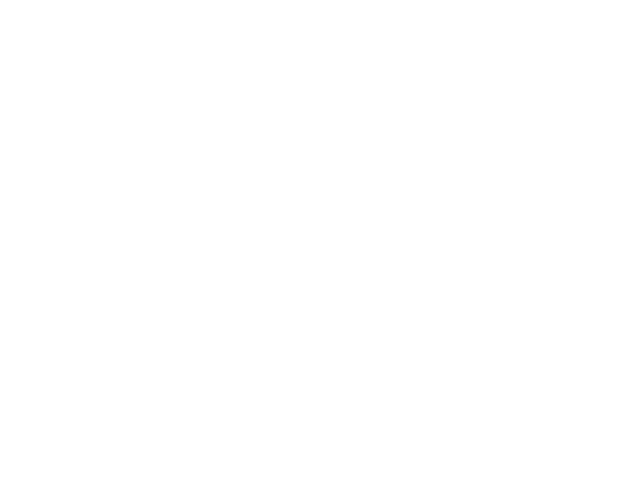

In [107]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlim((0, 60000))
ax.set_ylim((0, 90))
plt.xlabel('Income per person (Inflation-adjusted $)')
plt.ylabel('Life Expectancy (years)')

circs = {}
for country in countries:
    circs[country] = plt.plot([], [], 'o', label=country, markersize=30)[0]

ax.legend(loc='lower right', fontsize=12, markerscale=0.5, numpoints=1, frameon=False)
cur_year = ax.annotate("", (0.05, 0.9), xycoords='axes fraction', size='x-large', weight='bold')

def update_plot(year):
    for country in countries:
        circs[country].set_xdata([gdp_interpolated[year][country]])
        circs[country].set_ydata([lfexp_interpolated[year][country]])

        circs[country].set_markersize(get_population_markersize(pop_interpolated[year][country]))
        cur_year.set_text(year)

    return circs.values() + [cur_year]

#Creamos la animación con "FuncAnimation".
ani = animation.FuncAnimation(fig, update_plot, np.arange(1800, 2015), interval=100, repeat=False)

<div style="font-size:125%; display:inline; font-weight:bold">Ejercicio:</div> *Crear una animación que muestre las pirámides de población resultantes de las [proyecciones de población para los años 2015-2064 del Instituto Nacional de Estadística](http://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736176953&menu=resultados&idp=1254735572981), que se encuentran en el fichero `population_projection.xlsx`*.

En primer lugar, leemos los datos, e indexamos cada una de las tablas (hombres y mujeres) por la edad, para facilitar el acceso a los datos de interés.

In [109]:
df = pd.read_excel('../data/population_projection.xlsx', sheetname=None)
men, women = df['Varones'], df['Mujeres']
men.set_index('Edad', inplace=True)
women.set_index('Edad', inplace=True)
display(women.head(), women.tail())

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,...,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064
Edad,,,,,,,,,,,,,,,,,,,,,
0,198316,191878,185668,179764,174241,169164,164579,160517,156984,153975,...,122124,120297,118671,117241,115993,114918,114011,113257,112643,112156
1,205927,198137,191802,185683,179858,174404,169387,164854,160835,157340,...,124761,122747,120928,119308,117883,116639,115569,114665,113914,113303
2,219648,205648,198004,191764,185728,179976,174586,169624,165138,161160,...,127545,125353,123347,121533,119919,118499,117261,116195,115294,114546
3,228281,219198,205363,197859,191710,185754,180074,174745,169838,165398,...,130451,128101,125917,123918,122112,120504,119090,117856,116794,115897
4,231484,227856,218751,205074,197701,191639,185760,180147,174878,170022,...,133433,130957,128617,126441,124450,122651,121050,119641,118412,117355


,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,...,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064
Edad,,,,,,,,,,,,,,,,,,,,,
95,20190,23895,25521,28676,29794,31765,33047,35648,36508,40178,...,132398,138288,140039,145187,152026,162281,162675,165787,171933,172688
96,15585,16026,19054,20445,23078,24085,25790,26945,29186,30012,...,114688,119385,124946,126778,131693,138159,147755,148382,151490,157379
97,11033,12091,12501,14939,16114,18283,19177,20634,21662,23572,...,98378,102821,107271,112513,114407,119090,125192,134157,134990,138082
98,7908,8378,9239,9612,11553,12535,14304,15087,16323,17228,...,80046,87888,92079,96291,101230,103166,107626,113386,121763,122771
99,5682,5863,6255,6945,7273,8795,9603,11025,11700,12733,...,67016,71010,78175,82114,86089,90728,92687,96922,102346,110155


Como vemos, disponemos de datos para cada posible valor de edad entre 1 y 99 años. Sin embargo, a la hora de realizar pirámides de población, es habitual establecer grupos de edad [en márgenes de 5 años](http://www.ine.es/prensa/np813.pdf). Esto lo podemos hacer de forma muy sencilla con pandas y las funciones [`cut()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html) y [`groupby()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html).

In [110]:
categories, bins = pd.cut(women.index, np.append(women.index[::5], 100), retbins=True, )
gwomen = women.groupby(categories).sum()

categories, bins = pd.cut(men.index, np.append(men.index[::5], 100), retbins=True, )
gmen = women.groupby(categories).sum()

gmen.head()

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,...,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064
"(0, 5]",1121432,1081813,1041376,998715,959803,929329,901381,875137,850906,828924,...,652644,641064,630249,620309,611306,603253,596138,589930,584584,580047
"(5, 10]",1198859,1200737,1194488,1181150,1157641,1113257,1075802,1037443,996719,959943,...,724995,713760,701829,689567,677323,665397,654038,643424,633675,624841
"(10, 15]",1103279,1122745,1141470,1161752,1182032,1200238,1201999,1195934,1183156,1160159,...,776140,772539,767158,760050,751369,741352,730294,718549,706475,694420
"(15, 20]",1045155,1054888,1070733,1086624,1101213,1127062,1147486,1166801,1187283,1207551,...,807072,809795,811827,812834,812517,810658,807109,801799,794781,786211
"(20, 25]",1176198,1150297,1129121,1115431,1103590,1098008,1108583,1125212,1141914,1157313,...,859813,861172,863353,866116,869176,872219,874912,876926,877924,877615


In [111]:
categories, bins = pd.cut(women.index, np.append(women.index[::5], 100), retbins=True, )
#Tanto para la serie de varones como de mujeres, debemos agrupar por las categorías creadas,
#utilizando la función "groupby", y a continuación agregar el resultado sumando los valores
#de cada categoría, con la función "aggregate".

#Nota: no hace falta aggregate, es más directo con sum
gwomen = women.groupby(categories).sum()

categories, bins = pd.cut(men.index, np.append(men.index[::5], 100), retbins=True, )
gmen = women.groupby(categories).sum()

gwomen.head()

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,...,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064
"(0, 5]",1121432,1081813,1041376,998715,959803,929329,901381,875137,850906,828924,...,652644,641064,630249,620309,611306,603253,596138,589930,584584,580047
"(5, 10]",1198859,1200737,1194488,1181150,1157641,1113257,1075802,1037443,996719,959943,...,724995,713760,701829,689567,677323,665397,654038,643424,633675,624841
"(10, 15]",1103279,1122745,1141470,1161752,1182032,1200238,1201999,1195934,1183156,1160159,...,776140,772539,767158,760050,751369,741352,730294,718549,706475,694420
"(15, 20]",1045155,1054888,1070733,1086624,1101213,1127062,1147486,1166801,1187283,1207551,...,807072,809795,811827,812834,812517,810658,807109,801799,794781,786211
"(20, 25]",1176198,1150297,1129121,1115431,1103590,1098008,1108583,1125212,1141914,1157313,...,859813,861172,863353,866116,869176,872219,874912,876926,877924,877615


Para la visualización de los datos, el método [`barh()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.barh) de matplotlib nos proporciona una forma directa de representar las pirámides de población, necesitando únicamente pequeños ajustes estéticos.

<IPython.core.display.Javascript object>


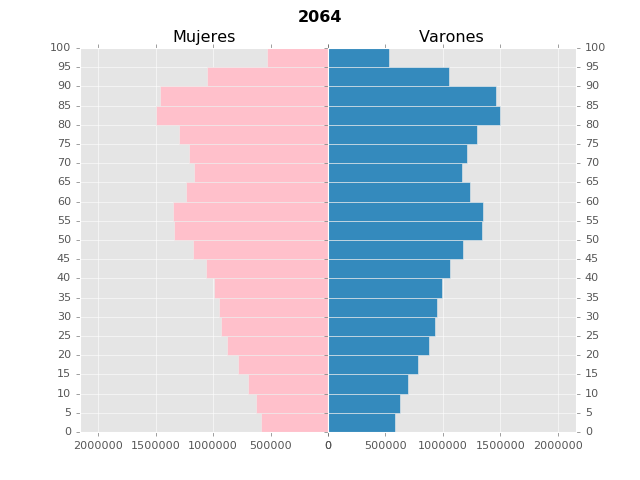

In [114]:
#Creamos dos gráficas que comparten el eje Y, y eliminamos el espacio horizontal
fig, (axw,axm)= plt.subplots(ncols=2, sharey=True)
plt.subplots_adjust(wspace=0)
#Primer año en la serie temporal
first_year = next(iter(gwomen))
#Etiqueta que muestra el año que se está visualizando
cur_year = plt.suptitle(str(first_year), size='x-large', weight='bold')
#Obtenemos el máximo de la coordenada X
xmax = max(np.amax(gwomen.values), np.amax(gmen.values))
#Establecemos el rango de X para las dos gráficas
axw.set_xlim((0, 1.1*xmax))
axm.set_xlim((0, 1.1*xmax))
#La gráfica de mujeres (a la izquierda) deberá estar invertida
axw.invert_xaxis()
#Otros ajustes estéticos
axw.yaxis.set_ticks(bins)
axm.tick_params(labelright=True)
axw.set_title('Mujeres')
axm.set_title('Varones')
#Creamos la gráfica para mujeres y para varones, con la función barh
wbars = axw.barh(bins[:-1], gwomen[first_year].values, height=5, color="pink") #
mbars = axm.barh(bins[:-1], gmen[first_year].values, height=5)



def update_pyramid(year):
    """Actualizamos la pirámide de población"""
    #Para cada una de las barras en "wbars" y "mbars", debemos actualizar
    #su tamaño con la función "set_width". Finalmente, actualizaremos
    #también el título, referenciado por la etiqueta "cur_year"
    #for idx in wbars:
    #    wbars[idx].set_width(gwomen[year][idx])

    for idx, item in enumerate(wbars):
        item.set_width(gwomen[year][idx])

    for idx, item in enumerate(mbars):
        item.set_width(gmen[year][idx])

    cur_year.set_text(year)
    
    return (wbars, mbars)

#Creamos la animación, utilizando FuncAnimation y pasando como parámetro "frames" el conjunto
#de años para los que disponemos de datos. En este caso, el parámetro "interval" será de 500ms

ani = animation.FuncAnimation(fig, update_pyramid, women.keys(), interval=500, repeat=False)

#inspect.getmembers(mbars[0], predicate=inspect.ismethod)

## Análisis de algoritmos

En esta práctica hemos visto ejemplos de visualizaciones dinámicas que nos ayudan a comprender mejor datos temporales, o a descubrir información adicional que no resulta fácilmente accesible mediante visualizaciones estáticas. Pero además de esto, una visualización dinámica puede resultar de gran ayuda para comprender el funcionamiento de ciertos algoritmos, y en particular aquellos que utilizaremos para construir modelos a partir de conjuntos de datos.

A continuación se muestra un ejemplo, [inspirado en el que podemos encontrar en la documentación de Scikit-learn](http://scikit-learn.org/stable/modules/svm.html), construiremos una animación que permita visualizar el proceso de aprendizaje de un clasificador SVM, lo que nos permitirá comprobar cómo los hiperplanos discriminantes de las distintas clases se van actualizando con la aparición de nuevos ejemplos.

<IPython.core.display.Javascript object>


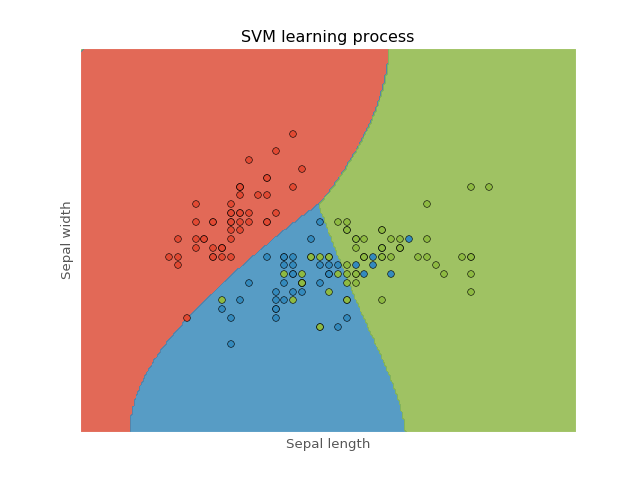

In [115]:
from sklearn import svm, datasets
import matplotlib.colors

#Conjunto de colores utilizado para el pintado
cols = ['#E24A33', '#348ABD', '#8EBA42']
#Cargamos el conjunto de datos
iris = datasets.load_iris()
X, y = iris.data[:, :2], iris.target
#Para hacer dinámico el aprendizaje, modificaremos los pesos de cada
#ejemplo, incluyendo uno más en cada iteración.
sample_weights = np.zeros_like(y)
#Reordenamiento aleatorio de los ejemplos
transp = np.random.permutation(np.c_[X,y])
X, y = transp[:, :2], transp[:, 2].astype(int)

#Instancia de SVM que utilizaremos para el aprendizaje
vm = svm.SVC()

#Creamos una malla para dibujar el área de cada clase
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure()
#Configuramos los ejes
ax = fig.add_subplot(111)
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('SVM learning process')
#Añadimos las gráficas que dibujarán los puntos de cada una de las clases.
pts = {k : ax.plot([], [], 'o', color=cols[k])[0] for k in np.unique(y)}
#Dibujo del área de clasificación de cada clase.
contours = None

def update_classifier(nsamp):
    #Eliminamos los contornos de cada clase
    global contours
    if contours is not None:
        for cont in contours.collections:
            ax.collections.remove(cont)
    #Añadimos un nuevo ejemplo al entrenamiento
    sample_weights[nsamp] = 1
    vm.fit(X, y, sample_weights)
    #Calculamos la salida para cada punto de la malla
    Z = vm.predict(np.c_[xx.ravel(), yy.ravel()])
    #Y la dibujamos
    Z = Z.reshape(xx.shape)
    contours = ax.contourf(xx, yy, Z, alpha=0.8, colors=cols, levels=[0, 0.5, 1.5, 2])
    #Añadimos el nuevo punto a la gráfica correspondiente.
    lastx, lasty = X[nsamp]
    xpt, ypt = pts[y[nsamp]].get_data()
    pts[y[nsamp]].set_data(np.append(xpt, lastx), np.append(ypt, lasty))
    return pts.values() + contours.collections

ani = animation.FuncAnimation(fig, update_classifier, len(y), interval=100, repeat=False)

## Recursos adicionales

En esta introducción a las herramientas de visualización dinámica nos hemos centrado en el paquete `matplotlib`, al ser el más popular dentro del ecosistema Python. Sin embargo, existen otras librerías, normalmente basadas o compatibles con `matplotlib`, que pueden resultar muy útiles a la hora de crear visualizaciones dinámicas e interactivas. Destacamos las siguientes:

 - Bokeh: http://bokeh.pydata.org/en/latest/
 - Seaborn: https://stanford.edu/~mwaskom/software/seaborn/
 - NVD3: https://github.com/areski/python-nvd3
 - MPLD3: http://mpld3.github.io/